## Delta H0 Lx-T vs Delta H0 Ysz-T contour
Plus angular separation cut

In [23]:
import pandas as pd
data1 = pd.read_csv('/cosma/home/do012/dc-he4/anisotropy-flamingo/data/analysis_all/h0_direct_compare.csv')
data1

,Relations,Delta_H0,Significance,Glon,Glat,Lightcone
0,$L_\mathrm{{X}}-T$,0.051844,2.356872,-40.641361,42.472119,0
1,$L_\mathrm{{X}}-T$,0.037668,1.552214,52.866108,58.861169,1
2,$L_\mathrm{{X}}-T$,0.027505,1.120093,137.559549,44.219754,2
3,$L_\mathrm{{X}}-T$,0.052323,2.252205,103.455472,-22.855878,3
4,$L_\mathrm{{X}}-T$,0.072339,2.261565,45.534447,-30.787983,4
...,...,...,...,...,...,...
5176,$M_\mathrm{{gas}}-T$,0.011052,0.916874,-28.000000,-14.000000,1723
5177,$M_\mathrm{{gas}}-T$,0.011042,0.823058,32.600413,-25.051582,1724
5178,$M_\mathrm{{gas}}-T$,0.011063,0.942347,8.000000,6.000000,1725
5179,$M_\mathrm{{gas}}-T$,0.013835,1.479392,-176.000000,39.000000,1726


Correlation: -0.073 ± 0.174


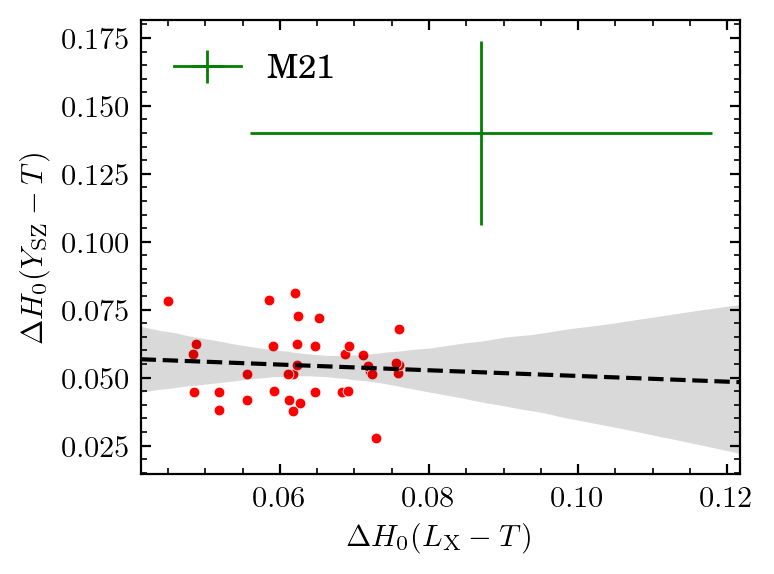

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

plt.style.use('./nice.mplstyle')
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

# select matched lightcones
mask1 = data1['Relations'] == '$L_\\mathrm{{X}}-T$'
mask2 = data1['Relations'] == '$Y_\\mathrm{{SZ}}-T$'
data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

lon1 = data_match_lc['Glon_x'].values
lat1 = data_match_lc['Glat_x'].values
lon2 = data_match_lc['Glon_y'].values
lat2 = data_match_lc['Glat_y'].values
theta = cf.angular_separation(lon1, lat1, lon2, lat2)

# pick the delta H0 values
delta_x = data_match_lc['Delta_H0_x']
delta_y = data_match_lc['Delta_H0_y']

# get also the significance
n_sig_x = data_match_lc['Significance_x']
n_sig_y = data_match_lc['Significance_y']

# constrain the angular separation to 20 degrees
angle_mask = theta < 50
n_sig_mask_x = n_sig_x > 2.5 # M21 LT bootstrap significance: 2.8; MC isotropic sample LT: 2.4
n_sig_mask_y = n_sig_y > 2.5 # M21 YT bootstrap significance: 4.1; MC isotropic sample YT: 2.6
delta_x_filtered = delta_x[angle_mask & n_sig_mask_x & n_sig_mask_y]
delta_y_filtered = delta_y[angle_mask & n_sig_mask_x & n_sig_mask_y]

n_sig_x_filtered = n_sig_x[angle_mask & n_sig_mask_x & n_sig_mask_y]
n_sig_y_filtered = n_sig_y[angle_mask & n_sig_mask_x & n_sig_mask_y]
error_x_filtered = delta_x_filtered / n_sig_x_filtered
error_y_filtered = delta_y_filtered / n_sig_y_filtered

# calculate the correlation coefficient
corr_coef, _ = pearsonr(delta_x_filtered, delta_y_filtered)

# calculate the standard error of the correlation coefficient
N = len(delta_x_filtered)
se = 1 / np.sqrt(N - 3)

# create a contour plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

# Use seaborn's kdeplot to create a contour plot
# sns.kdeplot(x=delta_x_filtered, y=delta_y_filtered, fill=False, levels=(0.011, 0.14, 0.61, 1.), bw_method=1, ax=ax)
# sns.kdeplot(x=delta_x_filtered, y=delta_y_filtered, fill=True, levels=(0.011, 0.14, 0.61, 1.), bw_method=1, ax=ax)

# Overlay a scatter plot with suitable marker style, size, and color
sns.scatterplot(x=delta_x_filtered, y=delta_y_filtered, marker='o', s=15, color='r', ax=ax)

# ax.errorbar(x=delta_x_filtered, y=delta_y_filtered, xerr=error_x_filtered, yerr=error_y_filtered, fmt='o', markersize=4, elinewidth=1, alpha=0.7)
ax.errorbar(x=0.087, y=0.14, xerr=0.031, yerr=0.034, label='M21', color='green')

# Plot the fitted correlation line
sns.regplot(x=delta_x_filtered, y=delta_y_filtered, scatter=False, ax=ax, truncate=False, color='black', line_kws={'linestyle':'dashed'})

# Display the correlation coefficient and its error on the plot
# ax.text(0.05, 0.95, f'Correlation: {corr_coef:.2f} ± {se:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
print(f'Correlation: {corr_coef:.3f} ± {se:.3f}')

# Set x, y label
ax.set_xlabel('$\Delta H_0 (L_\mathrm{X}-T)$')
ax.set_ylabel('$\Delta H_0 (Y_\mathrm{SZ}-T)$')

# Set legend
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.0),)

# Save fig 
plt.tight_layout()
plt.savefig('./to_paper/discussion-h0-YTvsLT.png')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation: 0.187 ± 0.126


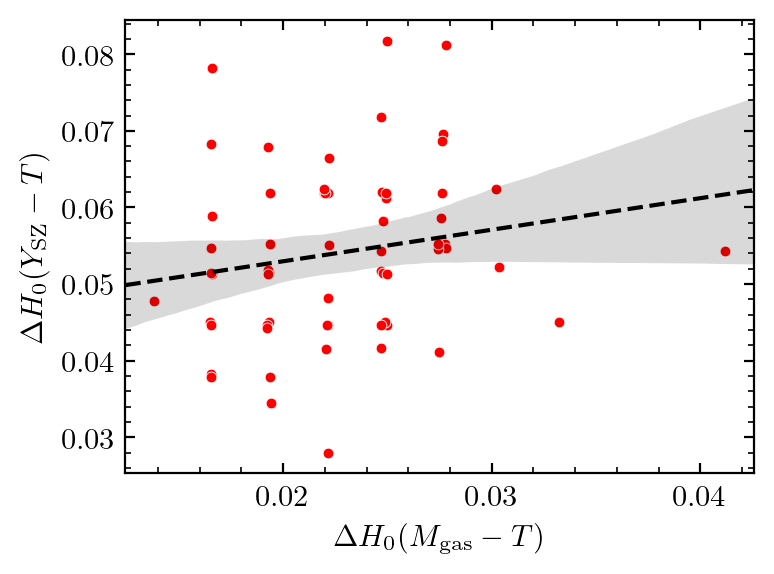

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

plt.style.use('./nice.mplstyle')
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

# select matched lightcones
mask1 = data1['Relations'] == '$M_\\mathrm{{gas}}-T$'
mask2 = data1['Relations'] == '$Y_\\mathrm{{SZ}}-T$'
data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

lon1 = data_match_lc['Glon_x'].values
lat1 = data_match_lc['Glat_x'].values
lon2 = data_match_lc['Glon_y'].values
lat2 = data_match_lc['Glat_y'].values
theta = cf.angular_separation(lon1, lat1, lon2, lat2)

# pick the delta H0 values
delta_x = data_match_lc['Delta_H0_x']
delta_y = data_match_lc['Delta_H0_y']

# constrain the angular separation to 20 degrees
angle_mask = theta < 50
n_sig_mask_x = data_match_lc['Significance_x'] > 2.5 # M21 LT bootstrap significance: 2.8; MC isotropic sample LT: 2.4
n_sig_mask_y = data_match_lc['Significance_y'] > 2.5 # M21 YT bootstrap significance: 4.1; MC isotropic sample YT: 2.6
delta_x_filtered = delta_x[angle_mask & n_sig_mask_x & n_sig_mask_y]
delta_y_filtered = delta_y[angle_mask & n_sig_mask_x & n_sig_mask_y]

# calculate the correlation coefficient
corr_coef, _ = pearsonr(delta_x_filtered, delta_y_filtered)

# calculate the standard error of the correlation coefficient
N = len(delta_x_filtered)
se = 1 / np.sqrt(N - 3)

# create a contour plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

# Use seaborn's kdeplot to create a contour plot
#sns.kdeplot(x=delta_x_filtered, y=delta_y_filtered, fill=False, levels=(0.011, 0.14, 0.61, 1.), bw_method=0.8, ax=ax)
#sns.kdeplot(x=delta_x_filtered, y=delta_y_filtered, fill=True, levels=(0.011, 0.14, 0.61, 1.), bw_method=0.8, ax=ax)

# Overlay a scatter plot with suitable marker style, size, and color
sns.scatterplot(x=delta_x_filtered, y=delta_y_filtered, marker='o', s=15, color='r', ax=ax)

# Plot the fitted correlation line
sns.regplot(x=delta_x_filtered, y=delta_y_filtered, scatter=False, ax=ax, truncate=False, color='black', line_kws={'linestyle':'dashed'})

# Display the correlation coefficient and its error on the plot
# ax.text(0.05, 0.95, f'Correlation: {corr_coef:.2f} ± {se:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
print(f'Correlation: {corr_coef:.3f} ± {se:.3f}')

ax.set_xlabel('$\Delta H_0 (M_\mathrm{gas}-T)$')
ax.set_ylabel('$\Delta H_0 (Y_\mathrm{SZ}-T)$')


plt.tight_layout()
plt.savefig('./to_paper/discussion-h0-YTvsMT.png')
plt.legend(loc='upper left', bbox_to_anchor=(0, 1.0),)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Correlation: 0.191 ± 0.095


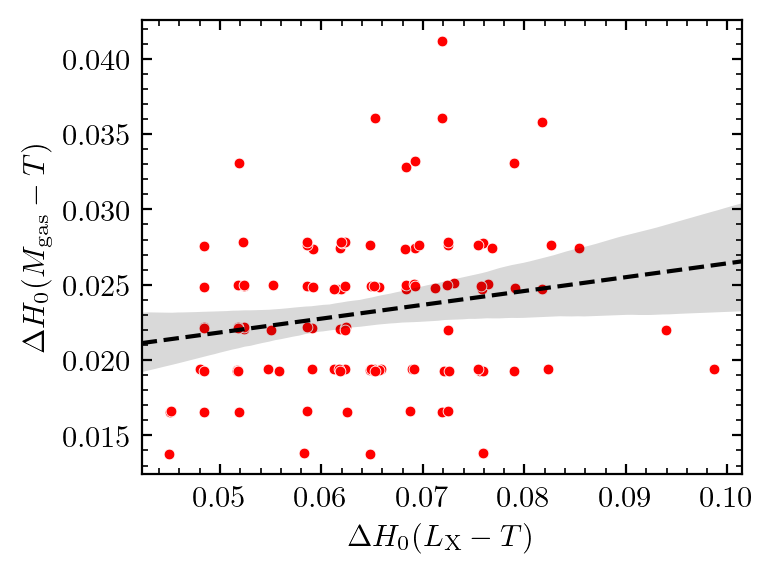

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

plt.style.use('./nice.mplstyle')
import sys
sys.path.append('/cosma/home/do012/dc-he4/anisotropy-flamingo/tools/')
import clusterfit as cf

# select matched lightcones
mask1 = data1['Relations'] == '$L_\\mathrm{{X}}-T$'
mask2 = data1['Relations'] == '$M_\\mathrm{{gas}}-T$'
data_match_lc = pd.merge(data1[mask1], data1[mask2], on='Lightcone', how='inner')

lon1 = data_match_lc['Glon_x'].values
lat1 = data_match_lc['Glat_x'].values
lon2 = data_match_lc['Glon_y'].values
lat2 = data_match_lc['Glat_y'].values
theta = cf.angular_separation(lon1, lat1, lon2, lat2)

# pick the delta H0 values
delta_x = data_match_lc['Delta_H0_x']
delta_y = data_match_lc['Delta_H0_y']

# constrain the angular separation to 20 degrees
angle_mask = theta < 50
n_sig_mask_x = data_match_lc['Significance_x'] > 2.5 # M21 LT bootstrap significance: 2.8; MC isotropic sample LT: 2.4
n_sig_mask_y = data_match_lc['Significance_y'] > 2.5 # M21 YT bootstrap significance: 4.1; MC isotropic sample YT: 2.6
delta_x_filtered = delta_x[angle_mask & n_sig_mask_x & n_sig_mask_y]
delta_y_filtered = delta_y[angle_mask & n_sig_mask_x & n_sig_mask_y]

# calculate the correlation coefficient
corr_coef, _ = pearsonr(delta_x_filtered, delta_y_filtered)

# calculate the standard error of the correlation coefficient
N = len(delta_x_filtered)
se = 1 / np.sqrt(N - 3)

# create a contour plot
fig, ax = plt.subplots(figsize=(4, 3), dpi=200)

# Use seaborn's kdeplot to create a contour plot
#sns.kdeplot(x=delta_x_filtered, y=delta_y_filtered, fill=False, levels=(0.011, 0.14, 0.61, 1.), bw_method=0.8, ax=ax)
#sns.kdeplot(x=delta_x_filtered, y=delta_y_filtered, fill=True, levels=(0.011, 0.14, 0.61, 1.), bw_method=0.8, ax=ax)

# Overlay a scatter plot with suitable marker style, size, and color
sns.scatterplot(x=delta_x_filtered, y=delta_y_filtered, marker='o', s=15, color='r', ax=ax)

# Plot the fitted correlation line
sns.regplot(x=delta_x_filtered, y=delta_y_filtered, scatter=False, ax=ax, truncate=False, color='black', line_kws={'linestyle':'dashed'})

# Display the correlation coefficient and its error on the plot
# ax.text(0.05, 0.95, f'Correlation: {corr_coef:.2f} ± {se:.2f}', transform=ax.transAxes, fontsize=12, verticalalignment='top')
print(f'Correlation: {corr_coef:.3f} ± {se:.3f}')

ax.set_xlabel('$\Delta H_0 (L_\mathrm{X}-T)$')
ax.set_ylabel('$\Delta H_0 (M_\mathrm{gas}-T)$')

plt.legend(loc='upper left', bbox_to_anchor=(0, 1.0),)

plt.tight_layout()
plt.savefig('./to_paper/discussion-h0-LTvsMT.png')
plt.show()